In [ ]:
import math
math.log2(0.5)*-1/2

0.5

In [ ]:
((-1/2)*math.log2(0.5))- ((1/2)*math.log2(0.5))

1.0

In [ ]:
# both sides as head
# p(h) = 1
# p(t) = 0

p_h = 1
p_t = 0
(-p_h*(math.log2(p_h))) # - (p_t*(math.log2(p_t)))

-0.0

In [ ]:
math.log2(p_h)

0.0

# Decision Tree

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [ ]:
type(cancer)

sklearn.utils.Bunch

In [ ]:
cancer.data # return data in an array - X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [ ]:
X = cancer.data
y = cancer.target

In [ ]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [ ]:
import pandas as pd
df = pd.DataFrame(X, columns = cancer.feature_names)
df['target'] = y
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [ ]:
#Initialize the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_test = tree.predict(X_test)
y_pred_train = tree.predict(X_train)

print("Accuracy score on training data is ",accuracy_score(y_pred_train,y_train))
print("Accuracy score on test data is ",accuracy_score(y_pred_test,y_test))
# Overfit model

Accuracy score on training data is  1.0
Accuracy score on test data is  0.9122807017543859


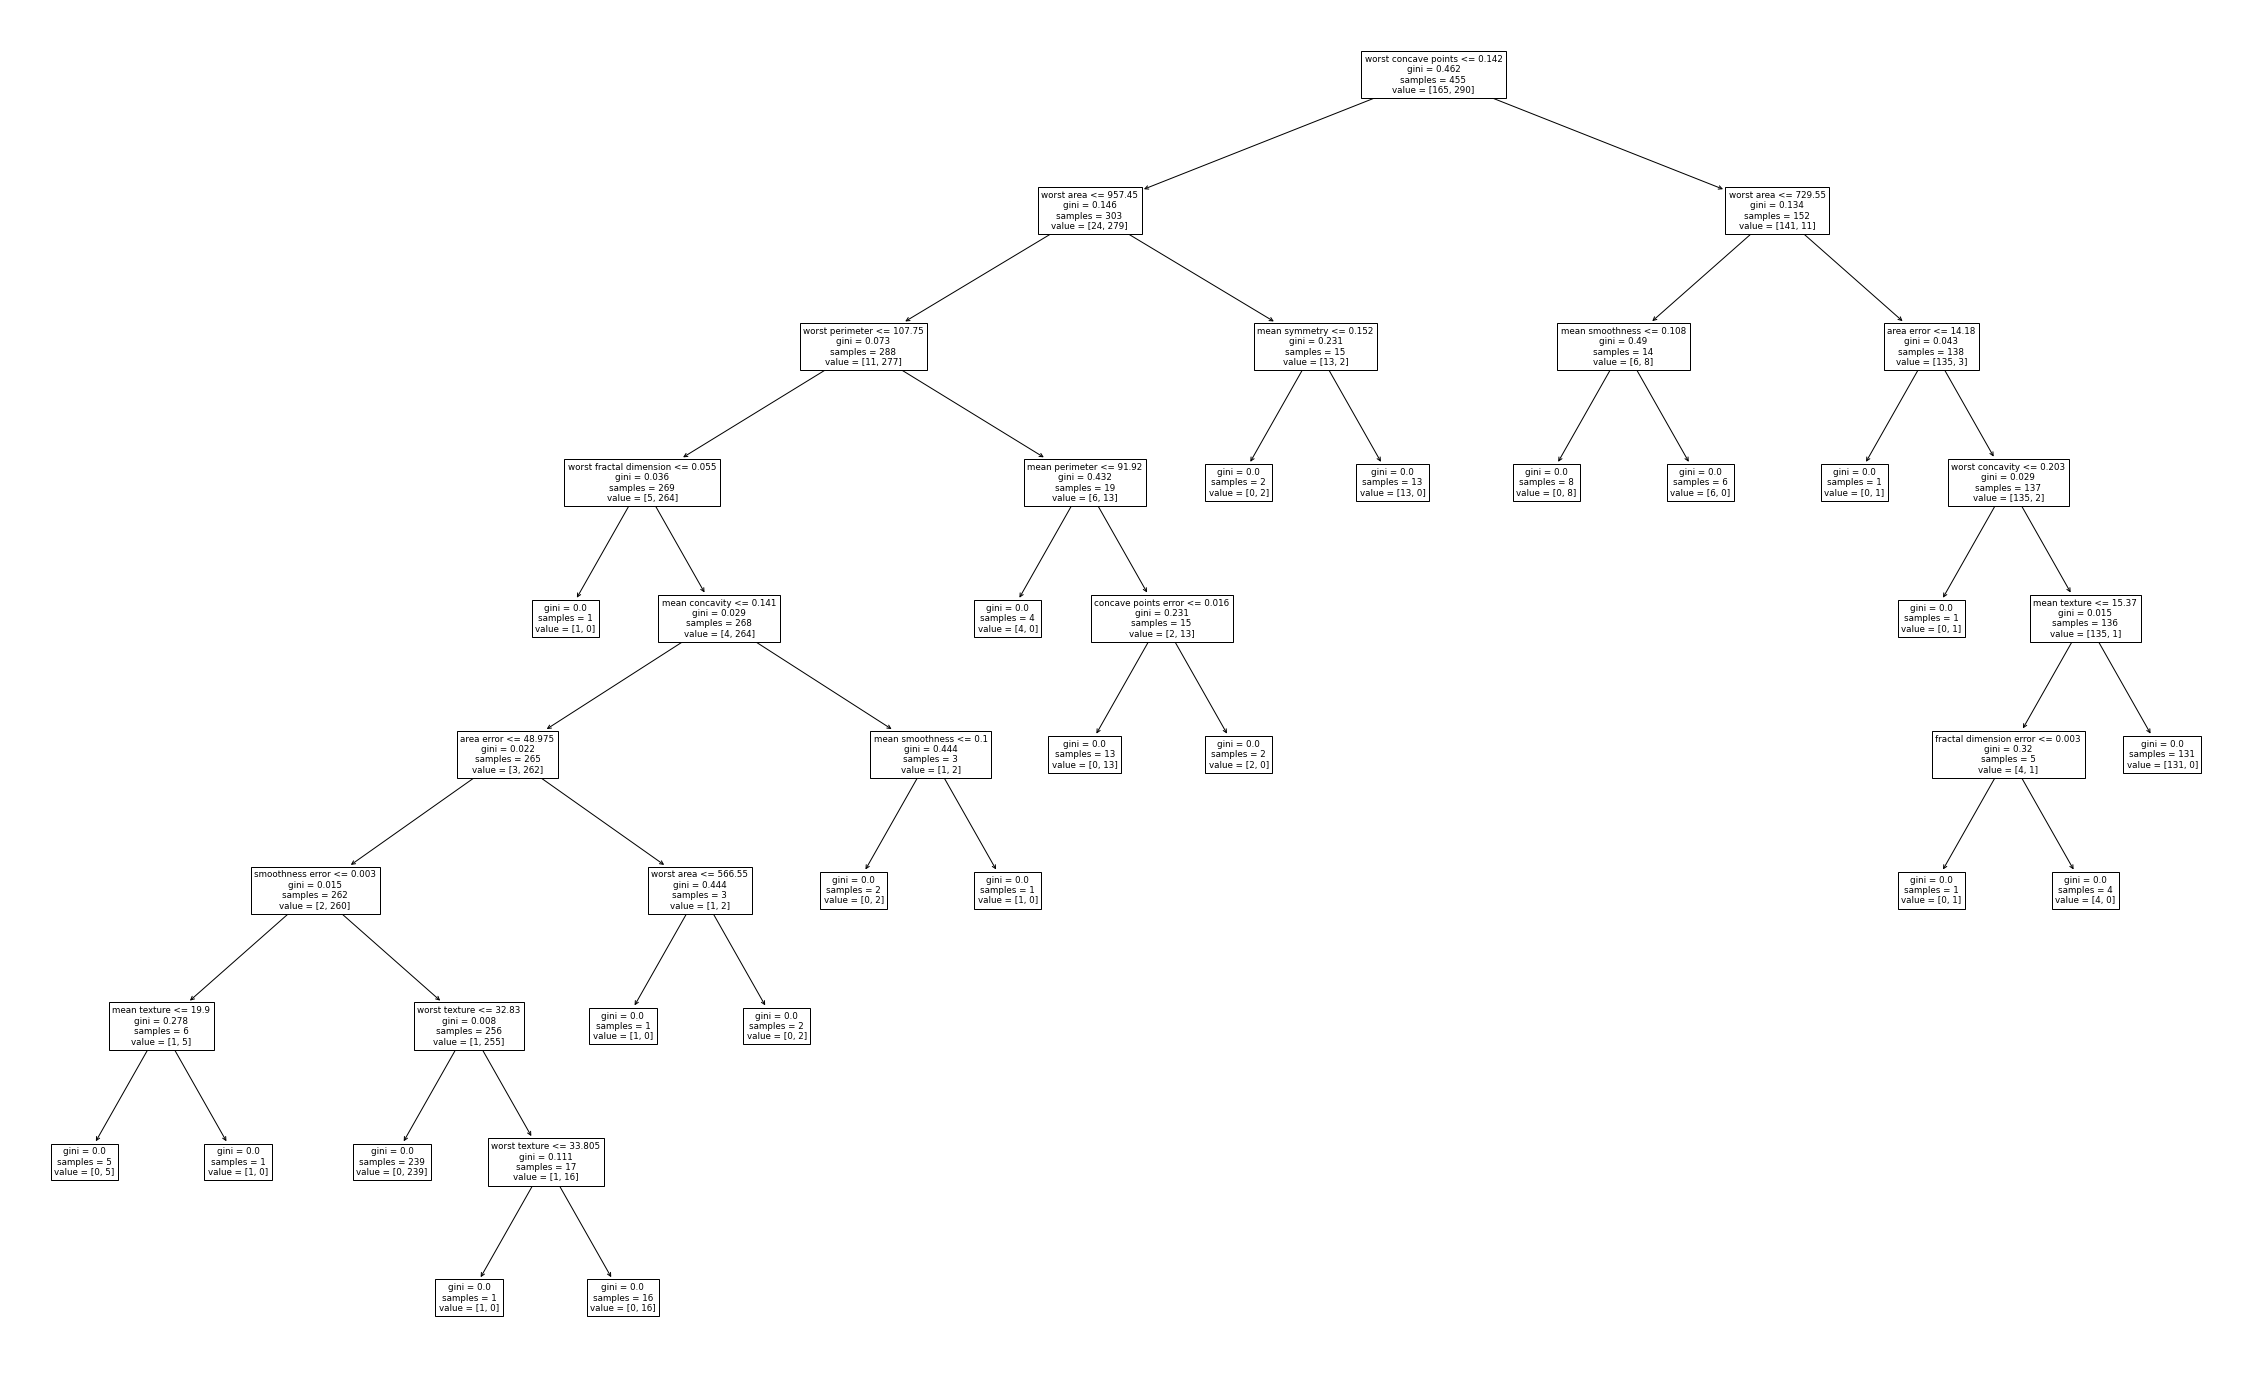

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,25))
plot_tree(tree,feature_names = cancer.feature_names)
plt.show()

In [ ]:
y_pred = tree.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9122807017543859

Accuracy score on training data is  0.9714285714285714
Accuracy score on test data is  0.9649122807017544


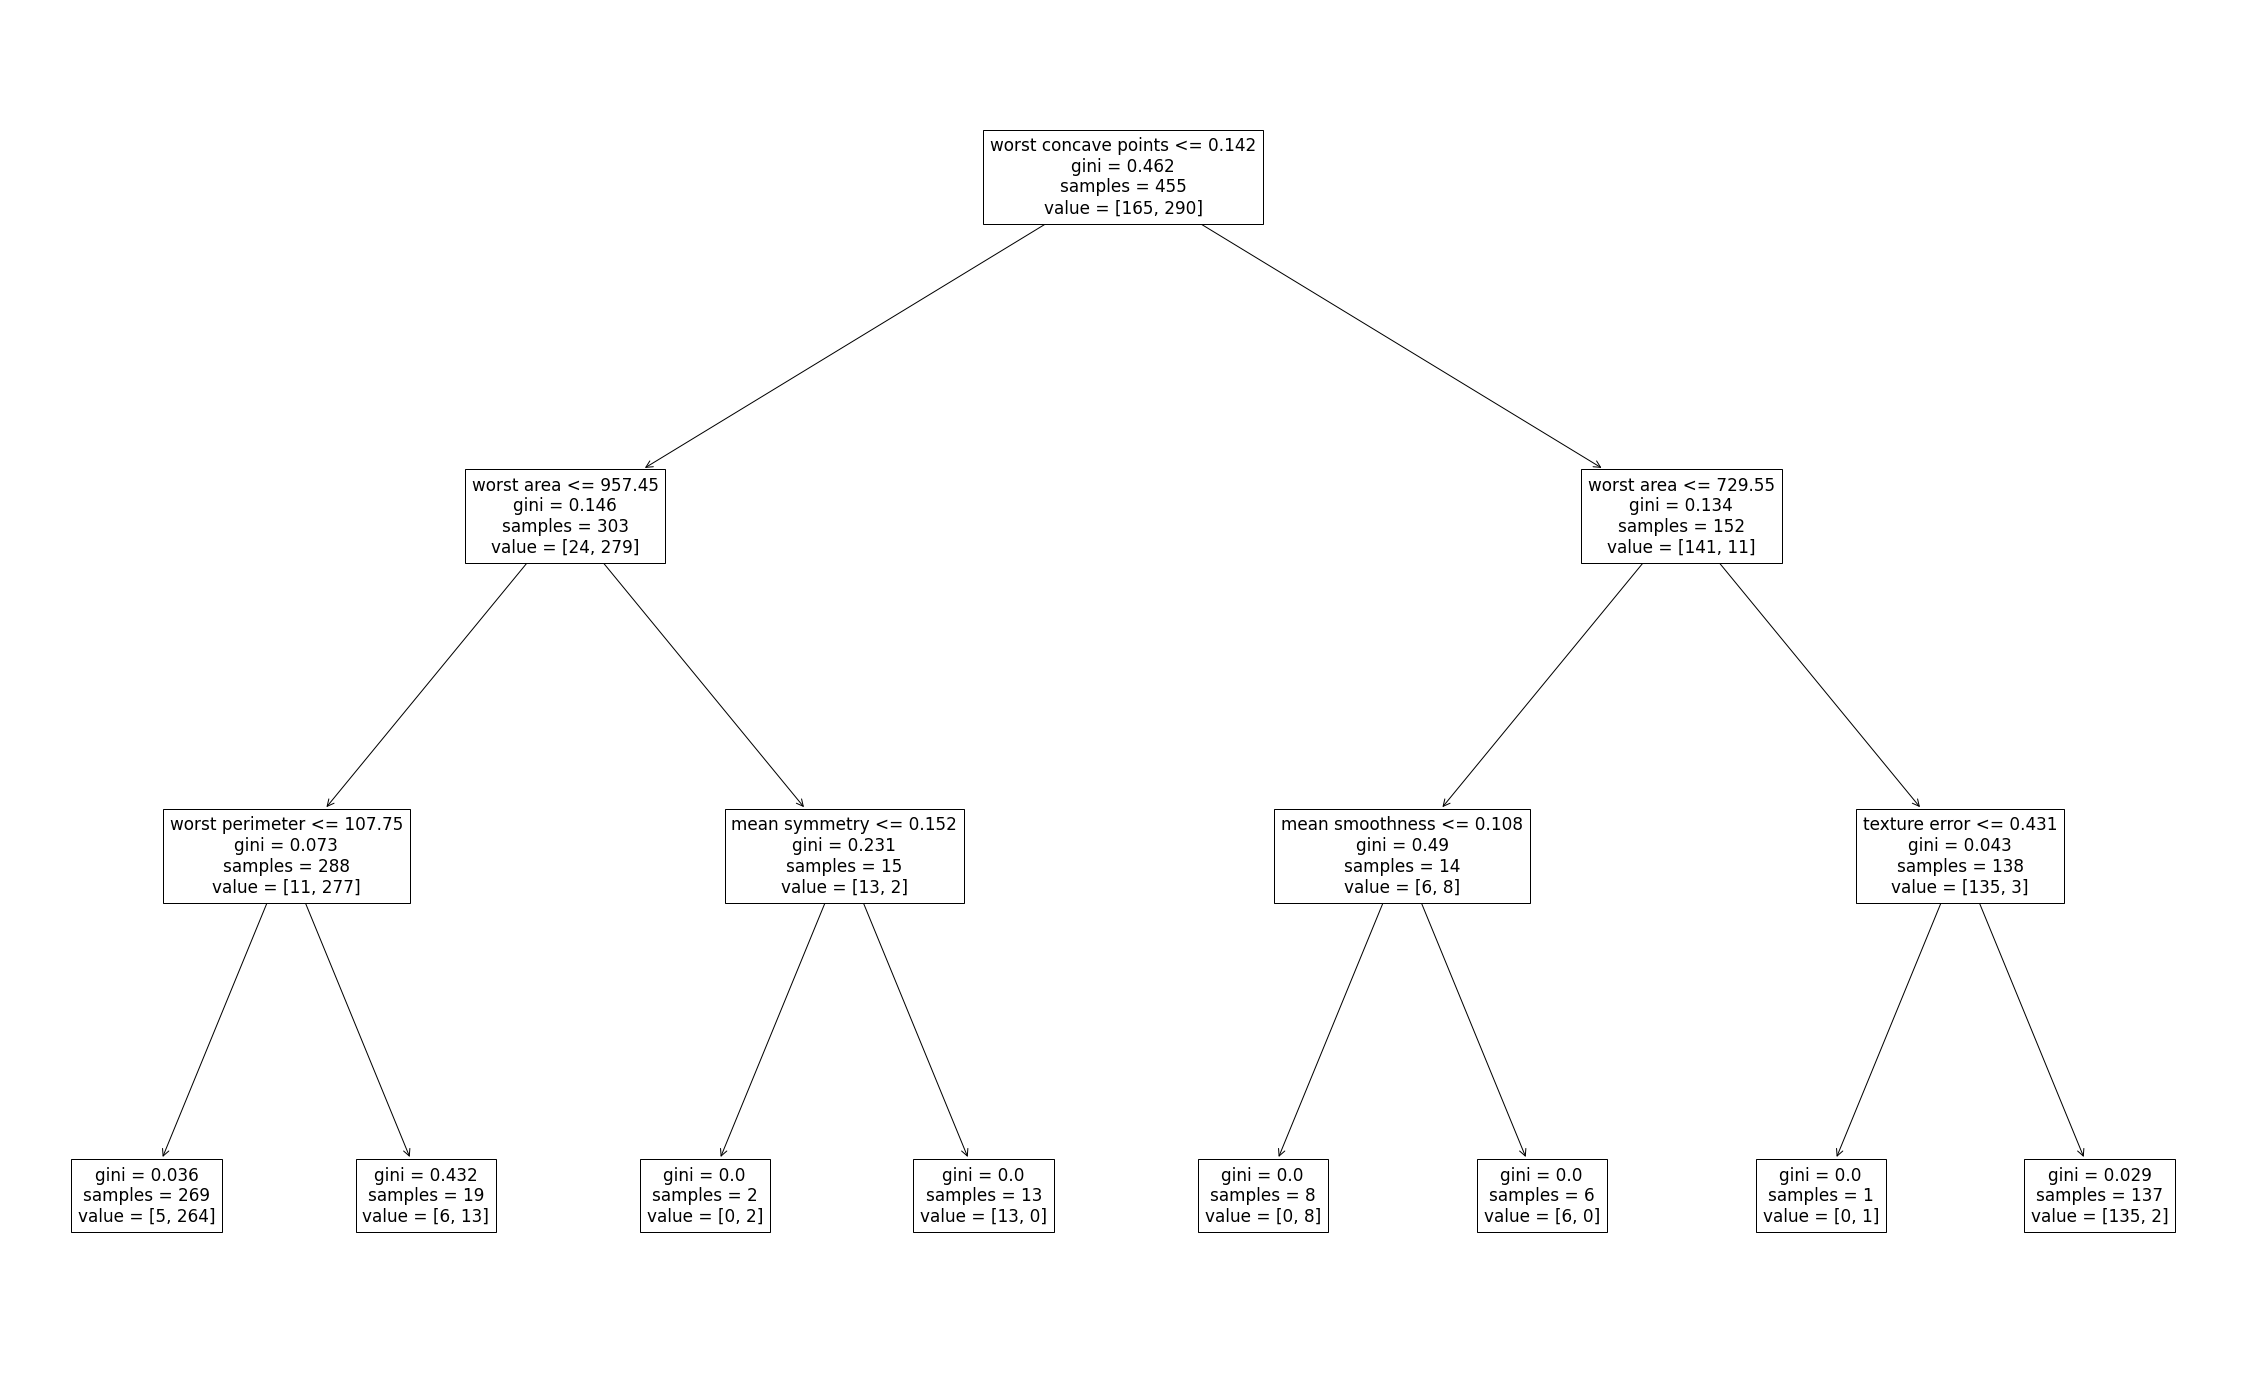

In [ ]:
#Initialize the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', random_state=0,max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
y_pred_test = tree.predict(X_test)
y_pred_train = tree.predict(X_train)
print("Accuracy score on training data is ",accuracy_score(y_pred_train,y_train))
print("Accuracy score on test data is ",accuracy_score(y_pred_test,y_test))
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names = cancer.feature_names)
plt.show()

0.9473684210526315


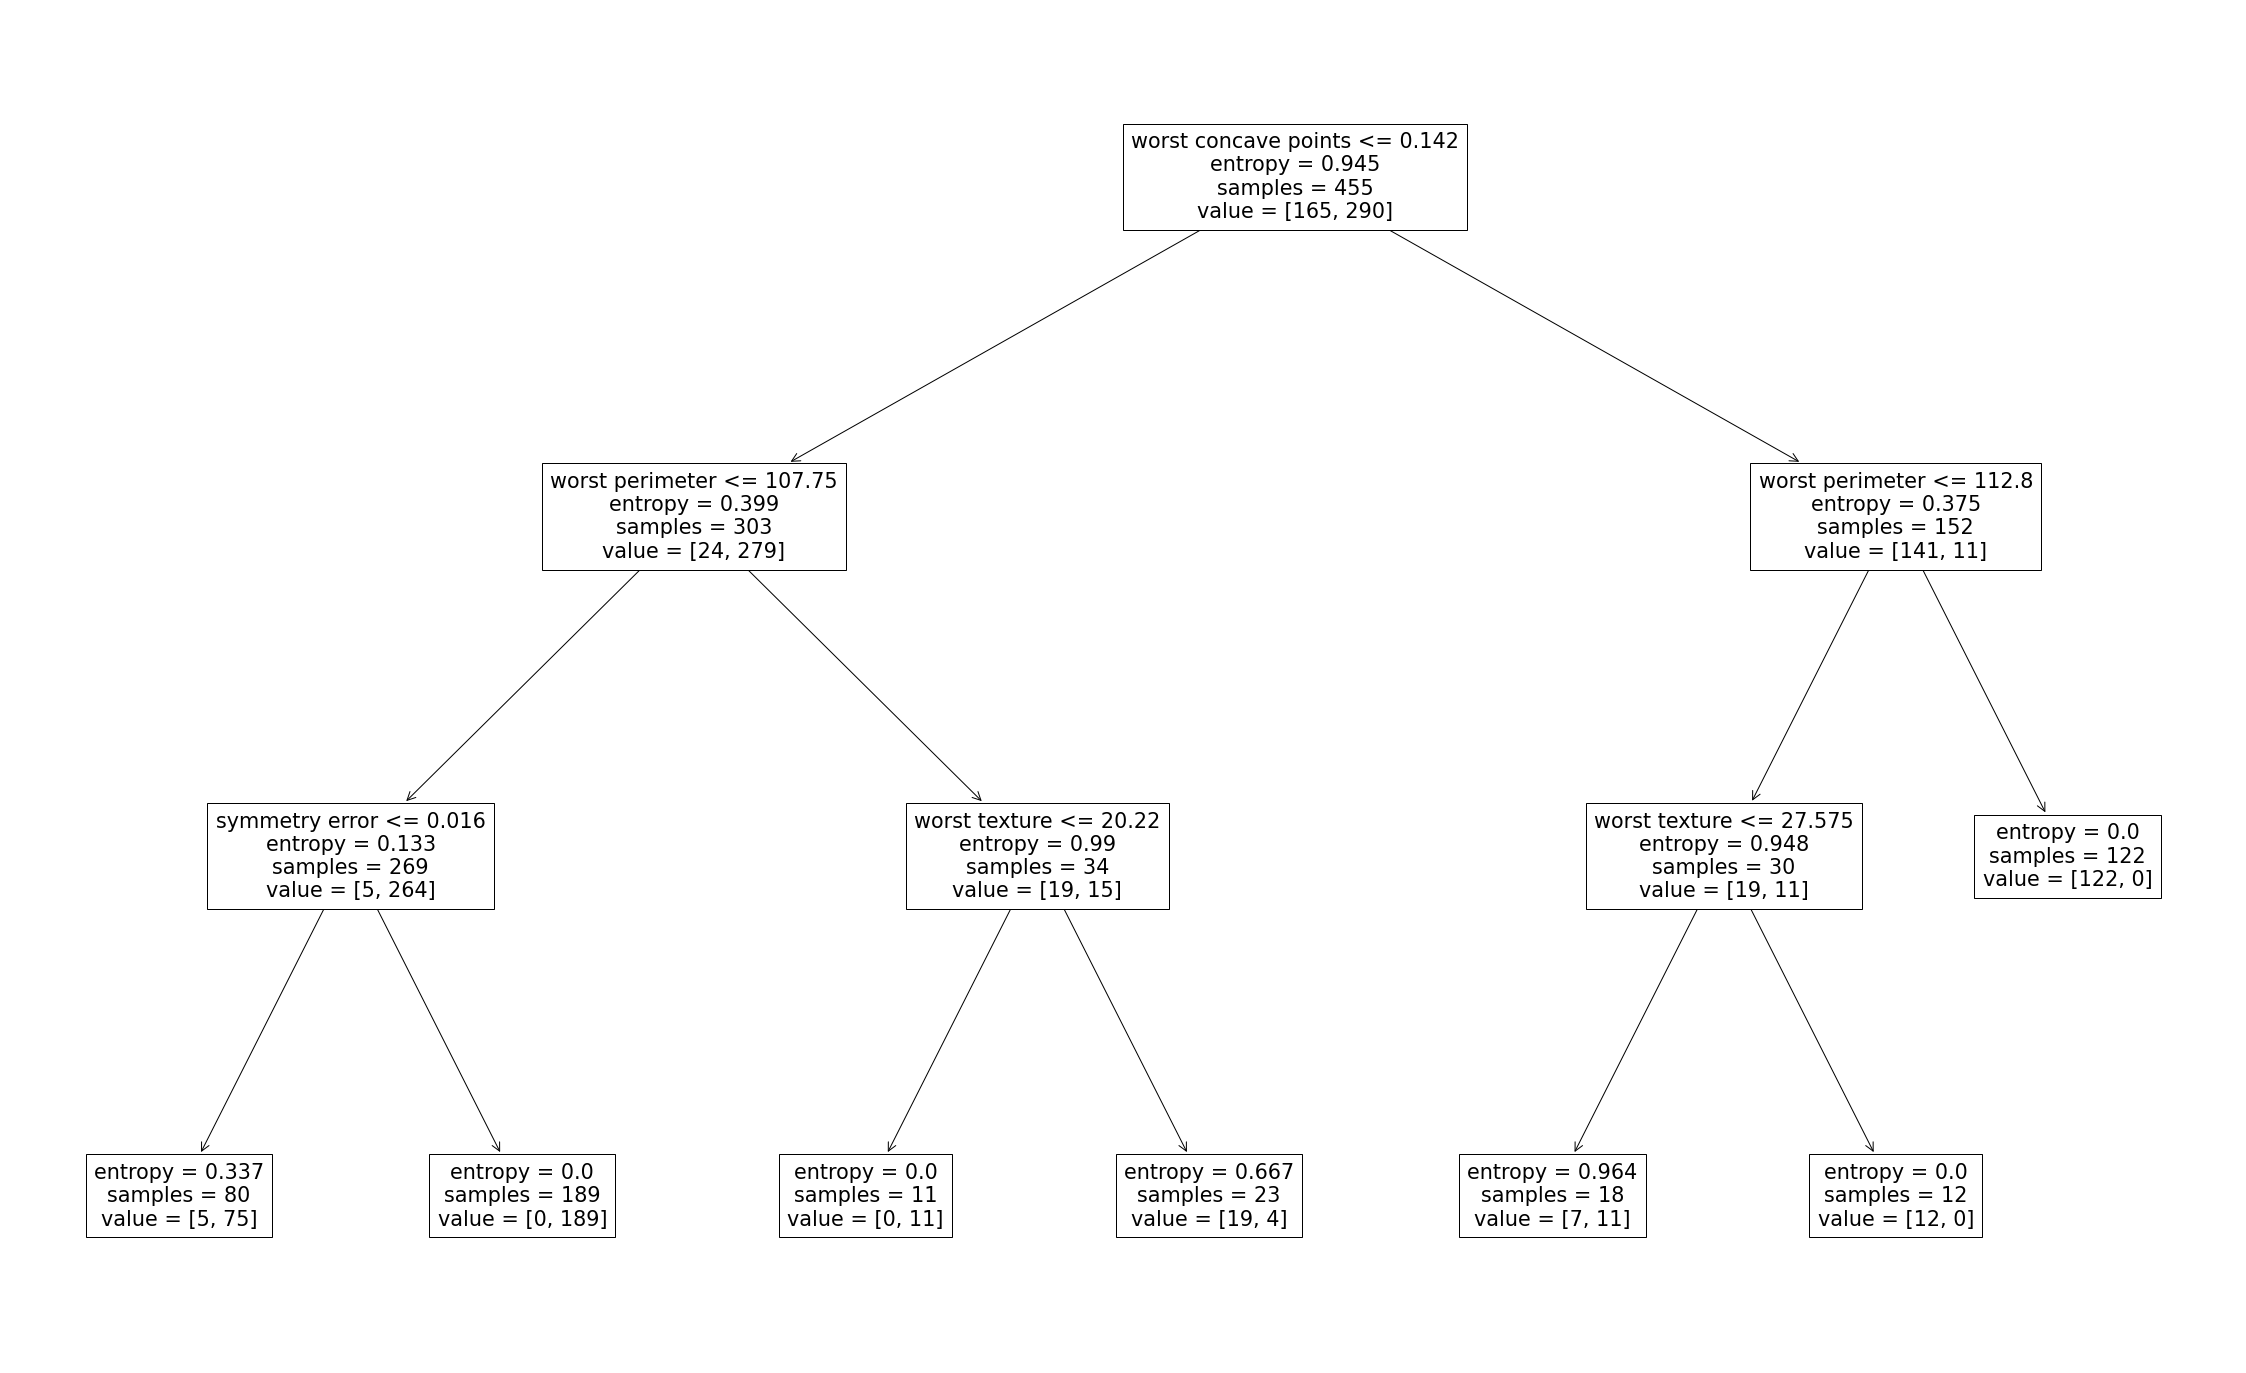

In [ ]:
#Initialize the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=3)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_pred,y_test))
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names = cancer.feature_names)
plt.show()

0.9210526315789473


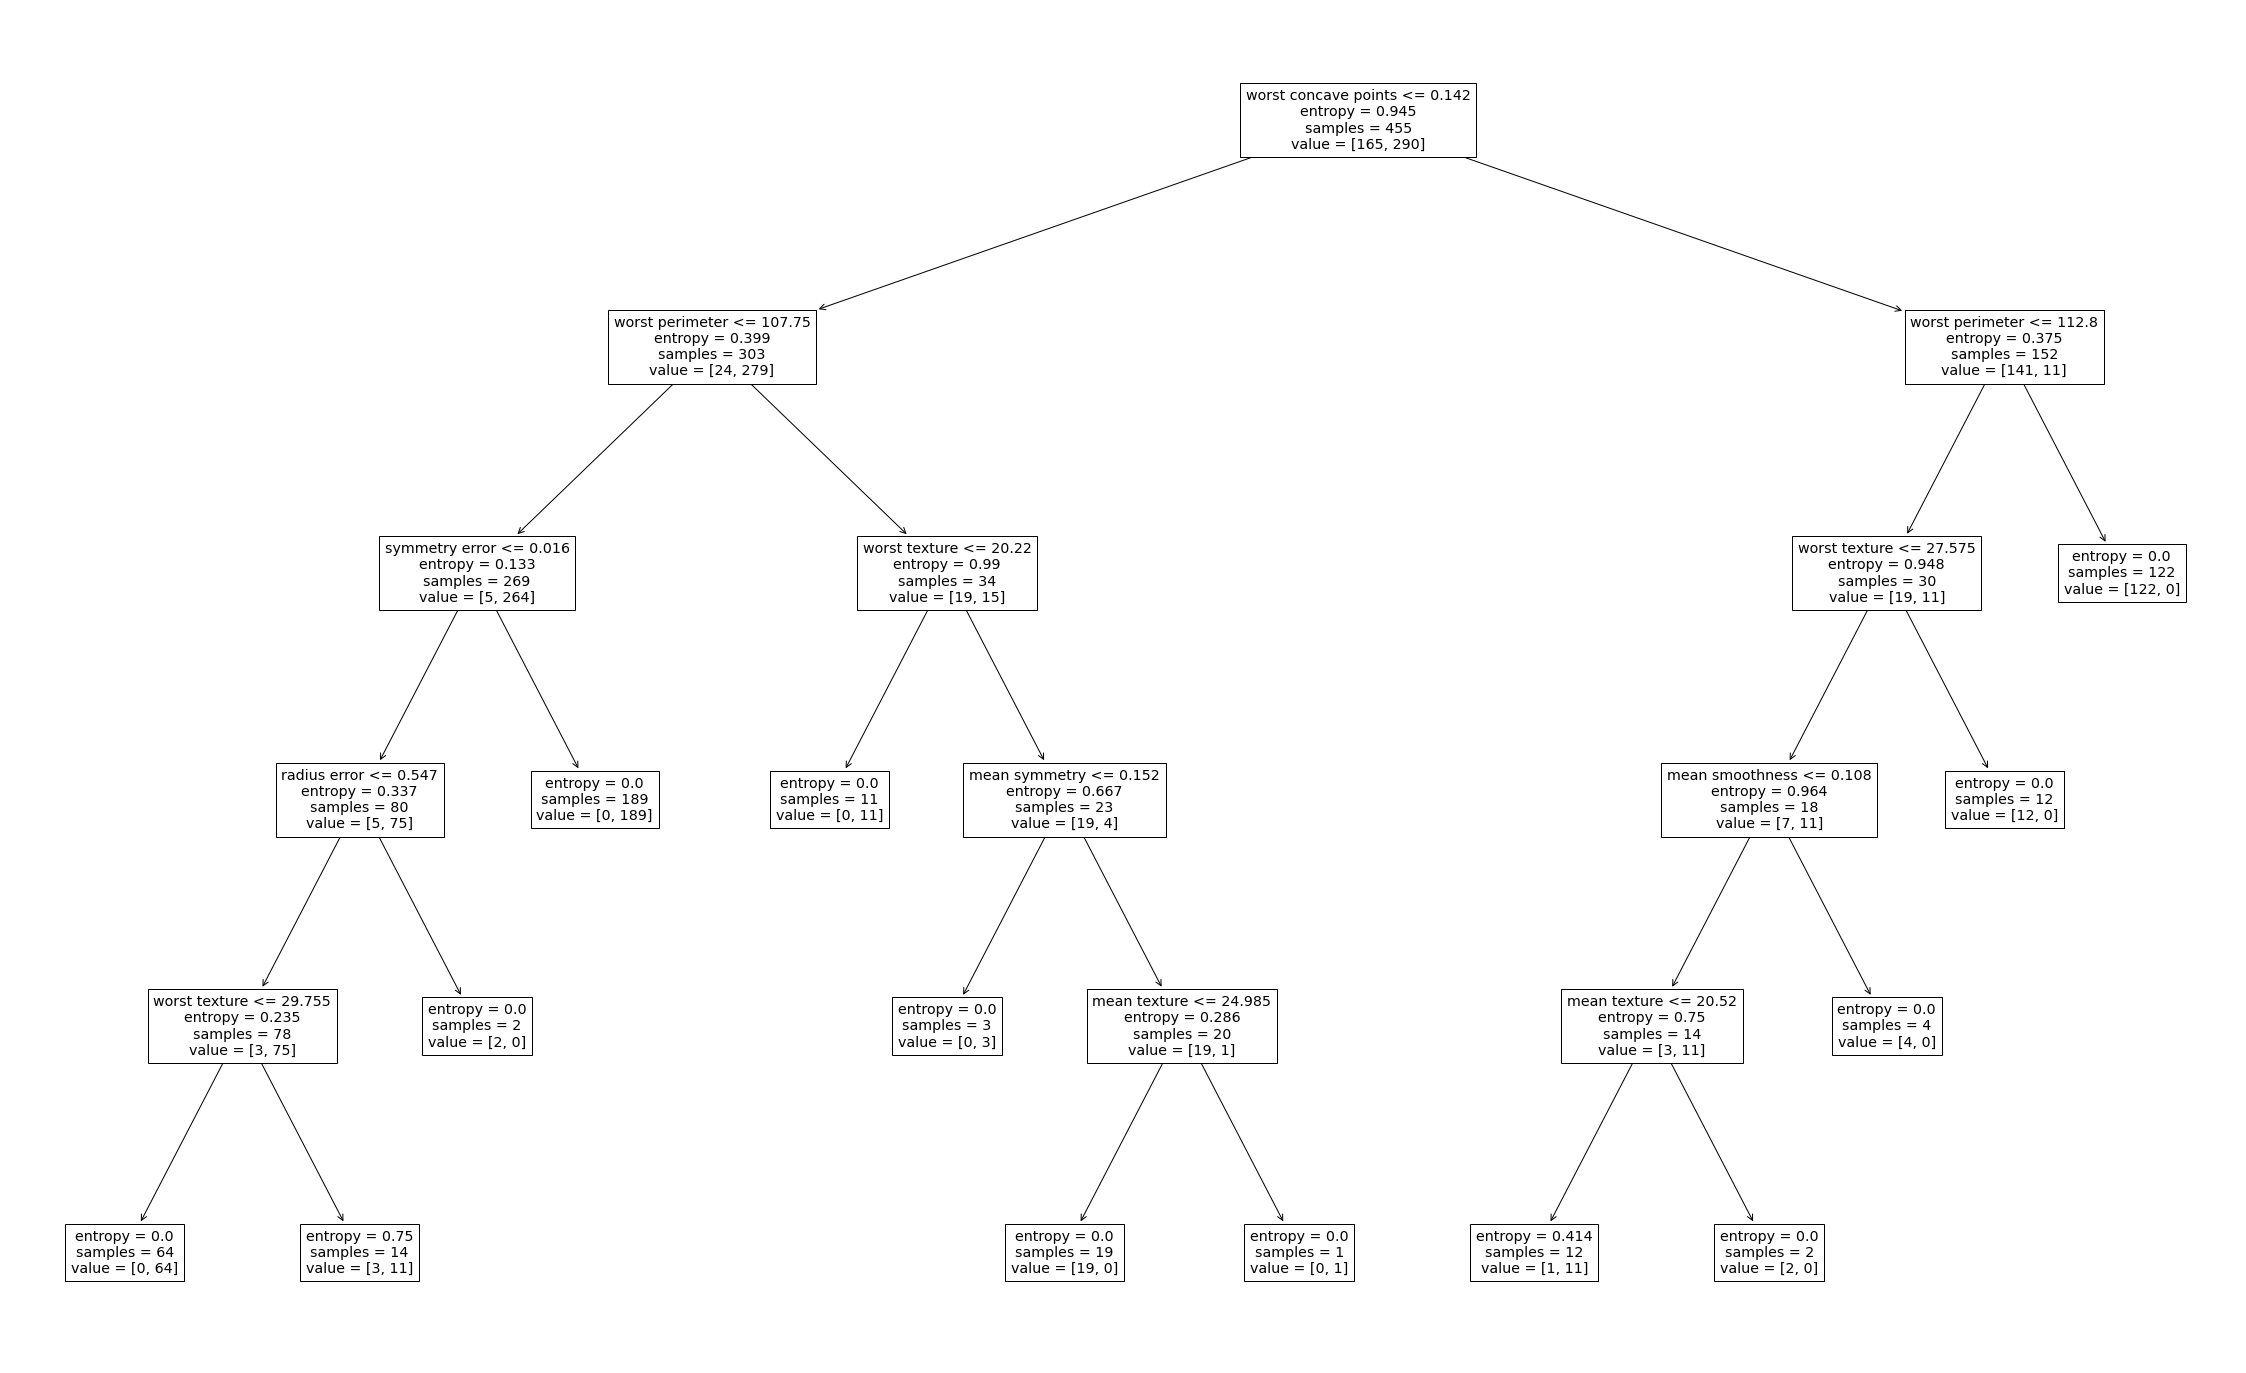

In [ ]:
#Initialize the model
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', random_state=0,max_depth=5)
tree.fit(X_train,y_train)
y_pred = tree.predict(X_test)
print(accuracy_score(y_pred,y_test))
plt.figure(figsize=(40,25))
plot_tree(tree,feature_names = cancer.feature_names)
plt.show()

In [ ]:
# Hyper parameter tuning technique --> Find the parameters of the model which performs best overall automatically
# GridSearchCV

In [1]:
from sklearn.model_selection import GridSearchCV
params= {"criterion": ['gini','entropy'],
         'max_depth':[2,3,4,5],
         'min_samples_leaf':[1,2,3]}

In [3]:
from sklearn.tree import DecisionTreeClassifier
tree1 = DecisionTreeClassifier(random_state=0)
grid_cv = GridSearchCV(estimator=tree1,
                       param_grid=params,
                       scoring='accuracy',
                       cv=10,
                       verbose=1)

In [ ]:
grid_cv.fit(X_train,y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3]},
             scoring='accuracy', verbose=1)

In [ ]:
5*24

120

In [ ]:
grid_cv.best_params_ # best model configuration of decision tree

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1}

In [ ]:
grid_cv.best_score_

0.9407246376811594

In [ ]:
pd.DataFrame(grid_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006573,0.001836,0.001085,0.000476,gini,2,1,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.891304,0.869565,...,0.934783,0.913043,0.955556,0.977778,0.866667,0.977778,0.933333,0.927633,0.039177,9
1,0.005841,0.000839,0.000895,0.000310,gini,2,2,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.891304,0.869565,...,0.934783,0.913043,0.955556,0.977778,0.866667,0.977778,0.933333,0.927633,0.039177,9
2,0.005442,0.000595,0.000830,0.000201,gini,2,3,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.891304,0.869565,...,0.934783,0.913043,0.955556,0.977778,0.866667,0.977778,0.933333,0.927633,0.039177,9
3,0.008625,0.002100,0.001514,0.001215,gini,3,1,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869565,0.847826,...,0.934783,0.934783,0.955556,0.977778,0.888889,0.977778,0.933333,0.925507,0.041463,14
4,0.008367,0.001653,0.001340,0.000647,gini,3,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.869565,0.847826,...,0.934783,0.934783,0.955556,0.977778,0.888889,0.977778,0.933333,0.925507,0.041463,14
5,0.009880,0.005218,0.000983,0.000169,gini,3,3,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.891304,0.847826,...,0.934783,0.934783,0.955556,1.000000,0.888889,0.933333,0.933333,0.927633,0.040260,12
6,0.037721,0.020128,0.004437,0.003801,gini,4,1,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.891304,0.934783,...,0.934783,0.934783,0.955556,0.977778,0.866667,0.977778,0.911111,0.934106,0.034187,3
7,0.013068,0.009485,0.001460,0.001481,gini,4,2,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.847826,0.934783,...,0.934783,0.934783,0.933333,0.977778,0.866667,0.977778,0.911111,0.927536,0.040507,13
8,0.009572,0.004381,0.001171,0.001354,gini,4,3,"{'criterion': 'gini', 'max_depth': 4, 'min_sam...",0.913043,0.934783,...,0.934783,0.934783,0.933333,0.977778,0.866667,0.955556,0.911111,0.931836,0.028880,6
9,0.009944,0.001567,0.000835,0.000088,gini,5,1,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.913043,0.913043,...,0.956522,0.956522,0.955556,0.977778,0.911111,0.977778,0.911111,0.940725,0.026051,1


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
tree = DecisionTreeClassifier(random_state=0)
random = RandomizedSearchCV(estimator = tree, param_distributions = params,
                            n_iter=5,
                            cv=10,
                            scoring='accuracy',
                            verbose=1)

random.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=0),
                   n_iter=5,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [2, 3, 4, 5],
                                        'min_samples_leaf': [1, 2, 3]},
                   scoring='accuracy', verbose=1)

In [ ]:
random.best_params_

{'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'gini'}

In [ ]:
random.best_score_

0.9341062801932367

# Randomforest

In [ ]:
# Ensemble Models
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=0, n_estimators=100,
                                criterion = 'gini',max_depth=4,
                                max_features='sqrt')
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt', random_state=0)

In [ ]:
import numpy as np
np.sum(forest.feature_importances_)

1.0

In [ ]:
pd.DataFrame(data = forest.feature_importances_,index= cancer.feature_names).sort_values(0, ascending=False)

,0
worst perimeter,0.179752
worst concave points,0.147127
worst radius,0.104352
mean concave points,0.095020
mean concavity,0.085270
mean perimeter,0.060610
worst area,0.055484
mean radius,0.038255
mean area,0.037563
area error,0.035648


In [ ]:
y_pred = forest.predict(X_test)
accuracy_score(y_test,y_pred)

0.9649122807017544

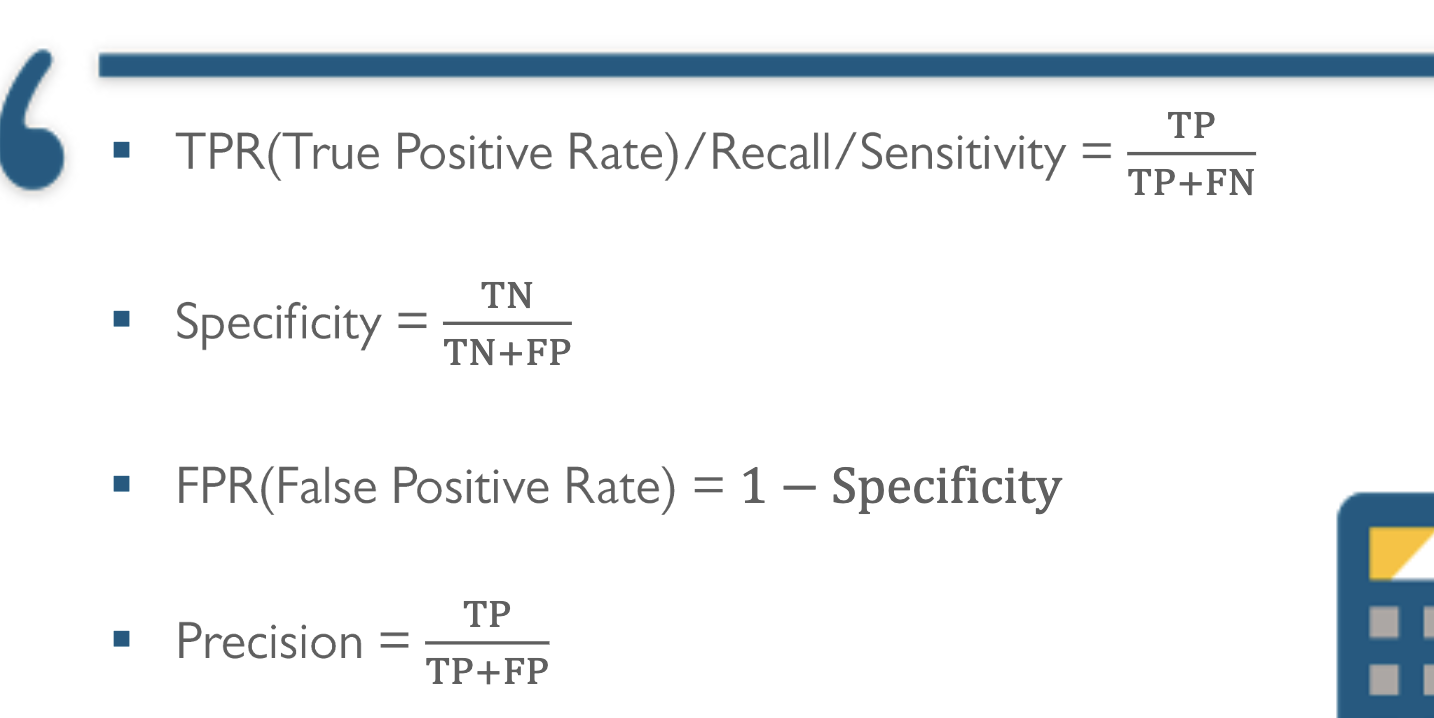

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        47
           1       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



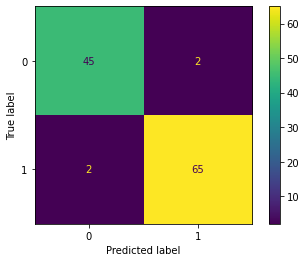

In [ ]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
# Apply GridSearchCV

In [ ]:
# params - number of leaves in Decision - (1 to 100) --> (10,20,30,40,50,60...100)
# 20 to 40
# (20,22,24,26,28,..40) --> 20 to 24
# (20,21,22,23,24)

# log method

In [ ]:
# Next session
# RandomSearchCV
# Cross validation
# Random Forest

In [ ]:
# SVM
# Naive Bayes Algorithm # classification
# KNN Model 
# Boosting - Adaboost, Gradient, XGBoost

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

from sklearn.metrics import f1_score
y_pred = nb.predict(X_test)
f1_score(y_pred,y_test)

0.9402985074626865

In [ ]:
from sklearn.naive_bayes import CategoricalNB # discrete values
from sklearn.naive_bayes import BernoulliNB # Binary values

In [ ]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

# SVC

In [ ]:
from sklearn.svm import SVC, SVR

In [ ]:
classifier = SVC(kernel='linear',C=0.2) 
# SVC - Support Vector classfier
# SVR - Support Vector Regressor
classifier.fit(X_train,y_train)

SVC(C=0.2, kernel='linear')

In [ ]:
y_pred = classifier.predict(X_test)
f1_score(y_test,y_pred)

0.9538461538461538

# Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bag = BaggingClassifier(base_estimator =SVC(kernel='linear',C=0.2) ,
                        max_features=0.8,
                        bootstrap_features=True,
                        random_state=0)
bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(C=0.2, kernel='linear'),
                  bootstrap_features=True, max_features=0.8, random_state=0)

In [ ]:
# Harmonic mean of recall and precision
# Gaussian NB - continuous values
# Bernoulli's NB - binary values

# Boosting Classifier
## AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100,
                         random_state=0)

ada.fit(X_train,y_train)

y_pred = ada.predict(X_test)
f1_score(y_test,y_pred)

0.962962962962963

# Gradient Boost Classfier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

In [ ]:
gradient.fit(X_train,y_train)
y_pred = gradient.predict(X_test)
f1_score(y_test,y_pred)

0.9701492537313433

https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb

# Experiment with Random data

In [ ]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y1 = tree_reg1.predict(X)
y1[:5]

array([0.12356613, 0.52856846, 0.12356613, 0.12356613, 0.12356613])

In [ ]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [ ]:
y2 = y - tree_reg1.predict(X) # Residual
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
y_2 = tree_reg2.predict(X)
y_2[:5]

array([-0.09039794,  0.03991297,  0.03991297, -0.09039794,  0.15983802])

In [ ]:
y1[:5]

array([0.12356613, 0.52856846, 0.12356613, 0.12356613, 0.12356613])

In [ ]:
iter1 = y1+y_2
print(iter1[:5])

[0.03316819 0.56848144 0.1634791  0.03316819 0.28340415]


In [ ]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [ ]:
y[:5]

array([ 0.0515729 ,  0.59447979,  0.16605161, -0.07017796,  0.34398593])

In [ ]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
iter_3 = tree_reg1.predict(X) + tree_reg2.predict(X) + tree_reg3.predict(X)
iter_3[:3]

array([0.04021166, 0.49995198, 0.17052257])

In [ ]:
y[:3]

array([0.0515729 , 0.59447979, 0.16605161])